# Random Forest como Método de Clasificación: Guía Paso a Paso

Este notebook detalla cómo usar **Random Forest** para resolver problemas de clasificación, incluye la configuración de los hiperparámetros, evaluación del modelo y análisis del rendimiento.

---

## 1. Introducción

Random Forest es un método de aprendizaje supervisado que combina múltiples árboles de decisión para mejorar la precisión y reducir el riesgo de sobreajuste. Es robusto y eficiente para problemas de clasificación y regresión.

### Ventajas
- Resistente al sobreajuste.
- Maneja datos con relaciones no lineales.
- Tolera valores atípicos y datos faltantes (en cierta medida).

### Importación de Bibliotecas



In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Generación del Conjunto de Datos

Para este ejemplo, utilizaremos un conjunto de datos sintético que generaremos con `make_classification`.


In [22]:
from sklearn.datasets import make_classification

# Generar datos sintéticos
X, y = make_classification(
    n_samples=500,  # Número de instancias
    n_features=10,  # Número de características
    n_informative=5,  # Número de características informativas
    n_redundant=2,  # Número de características redundantes
    n_classes=2,  # Número de clases
    random_state=42
)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Dimensiones de entrenamiento: {X_train.shape}")
print(f"Dimensiones de prueba: {X_test.shape}")


Dimensiones de entrenamiento: (350, 10)
Dimensiones de prueba: (150, 10)


### 3. Entrenamiento del Modelo

Entrenaremos un modelo básico de Random Forest con parámetros predeterminados.


In [23]:
# Configurar y entrenar el modelo Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicciones
y_pred = rf_classifier.predict(X_test)

# Evaluar el rendimiento inicial
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.96      0.90      0.93        82

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150

Matriz de Confusión:
 [[65  3]
 [ 8 74]]


### Reporte de Clasificación

El reporte muestra varias métricas para cada clase del modelo:

#### Clase 0 (primera clase en el reporte):
- **Precision (Precisión):** 0.89  
  - De todas las predicciones que el modelo hizo como clase 0, el 89% fueron correctas.  
  - **Fallo asociado:** Un 11% de las veces, predice incorrectamente la clase 0 (falsos positivos para clase 0).  
- **Recall (Sensibilidad):** 0.96  
  - De todas las instancias reales de clase 0, el modelo identificó correctamente el 96%.  
  - **Fallo asociado:** Un 4% de las instancias de clase 0 fueron clasificadas incorrectamente (falsos negativos).  
- **F1-Score:** 0.92  
  - La F1 es un equilibrio entre precisión y recall. Un valor de 0.92 indica un rendimiento sólido.  

#### Clase 1 (segunda clase en el reporte):
- **Precision:** 0.96  
  - De todas las predicciones que el modelo hizo como clase 1, el 96% fueron correctas.  
- **Recall:** 0.90  
  - De todas las instancias reales de clase 1, el modelo identificó correctamente el 90%.  
- **F1-Score:** 0.93  
  - Similar a la clase 0, el modelo tiene un rendimiento equilibrado entre precisión y sensibilidad.  

### Métricas Globales:
- **Accuracy (Precisión global):** 0.93  
  - El modelo predijo correctamente el 93% de todas las instancias.  
- **Macro avg:** Promedio no ponderado entre las clases. Tanto precisión como recall tienen un valor medio de 0.93.  
- **Weighted avg:** Promedio ponderado según el tamaño de las clases. También muestra un rendimiento sólido.  

---

### Matriz de Confusión

La matriz detalla cómo se distribuyen las predicciones en función de las clases reales:

|                      | **Predicción Clase 0** | **Predicción Clase 1** |
|----------------------|-------------------------|-------------------------|
| **Clase 0 (Real)**   | 65 (TP)                | 3 (FN)                 |
| **Clase 1 (Real)**   | 8 (FP)                 | 74 (TN)                |

- **65 verdaderos positivos (TP):**  
  Instancias reales de clase 0 correctamente clasificadas.  
- **3 falsos negativos (FN):**  
  Instancias reales de clase 0 clasificadas erróneamente como clase 1.  
- **8 falsos positivos (FP):**  
  Instancias reales de clase 1 clasificadas erróneamente como clase 0.  
- **74 verdaderos negativos (TN):**  
  Instancias reales de clase 1 correctamente clasificadas.  

---

### Análisis de Resultados

#### Balance de Clases:
- Las métricas globales (precisión, recall y F1) son altas y consistentes, lo que indica que el modelo maneja bien ambas clases.  
- La clase 1 tiene un poco más de falsos negativos (FN) y falsos positivos (FP), pero sigue siendo bien clasificada en general.  

#### Errores Observados:
- La mayoría de los errores provienen de la confusión entre las clases (FP o FN).  
- El modelo confundió la clase 1 con la clase 0 en 8 casos y la clase 0 con la clase 1 en 3 casos.  

#### Desempeño General:
- El modelo tiene un desempeño robusto con un **accuracy del 93%**.  
- Las métricas para ambas clases (precisión, recall, F1) están equilibradas, lo que indica que el modelo no favorece una clase sobre la otra.  

---


El modelo de Random Forest tiene un excelente desempeño con este conjunto de datos. Aunque hay algunos errores (11 en total), las métricas indican que el modelo es confiable y equilibrado.  

#### Para mejorar, podrías:
1. Ajustar los hiperparámetros como `max_depth`, `min_samples_split` o `n_estimators`.  
2. Realizar una validación cruzada para evaluar la estabilidad del modelo.  
3. Analizar la importancia de las características para identificar posibles redundancias o información irrelevante.  


### 4. Visualización de la Importancia de las Características

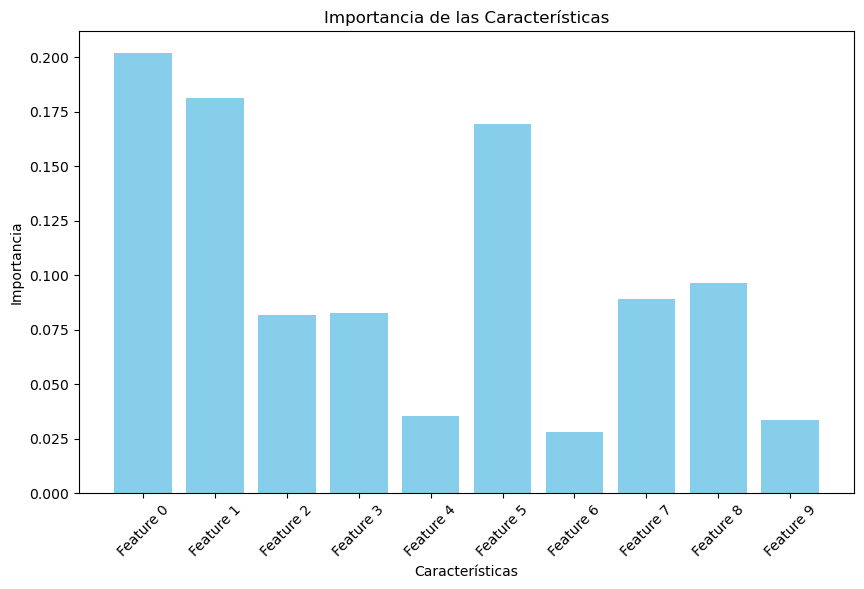

In [24]:
# Importancia de las características
importances = rf_classifier.feature_importances_
feature_names = [f'Feature {i}' for i in range(X.shape[1])]

# Gráfico de barras de importancia
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances, color='skyblue')
plt.title("Importancia de las Características")
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.xticks(rotation=45)
plt.show()


### Análisis de la Importancia de las Características

Este gráfico muestra la importancia de las características en un modelo de clasificación con Random Forest. Cada característica (Feature 0 a Feature 9) tiene un valor de importancia asociado que indica su contribución relativa a la precisión de las predicciones.

---

#### Característica Dominante:
- **Feature 0** y **Feature 5** tienen las importancias más altas en el modelo, lo que sugiere que estas dos características son las más relevantes para la clasificación.
- **Feature 0** tiene la importancia más alta (alrededor de 0.20), lo que significa que el modelo depende significativamente de esta característica para hacer predicciones.

---

#### Características Moderadamente Importantes:
- **Feature 1**, **Feature 2**, **Feature 3**, **Feature 7**, y **Feature 8** también contribuyen, aunque en menor medida que **Feature 0** y **Feature 5**.
- Estas características probablemente tienen una influencia moderada en el modelo y pueden ser importantes en ciertos casos.

---

#### Características Menos Importantes:
- **Feature 6** y **Feature 9** tienen la menor importancia en el modelo.
- Es posible que estas características contengan información redundante o tengan poca variabilidad, lo cual las hace menos útiles para la clasificación.

---

### Interpretación General:
- El modelo de Random Forest selecciona múltiples características, pero prioriza aquellas con una mayor importancia para mejorar la precisión.
- Las características con alta importancia son las que contribuyen más a la toma de decisiones en cada árbol del bosque, mientras que las características con baja importancia tienen un impacto menor en el rendimiento del modelo.

---


Este análisis sugiere que **Feature 0** y **Feature 5** son las características clave para este modelo de clasificación. En aplicaciones prácticas, podrías considerar estas características como prioritarias para el análisis, o incluso realizar una reducción de dimensionalidad eliminando características con baja importancia para simplificar el modelo sin perder demasiada precisión.


## 5. Ajuste de Hiperparámetros

Exploraremos algunos de los parámetros clave:

- **`n_estimators`:** Número de árboles en el bosque.
- **`max_depth`:** Profundidad máxima de los árboles.
- **`min_samples_split`:** Mínimo número de muestras necesarias para dividir un nodo.
- **`min_samples_leaf`:** Mínimo número de muestras necesarias en una hoja.


In [25]:
for n_estimators in [10, 50, 100, 200]:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"n_estimators={n_estimators}, Accuracy={accuracy:.4f}")


n_estimators=10, Accuracy=0.8933
n_estimators=50, Accuracy=0.9200
n_estimators=100, Accuracy=0.9267
n_estimators=200, Accuracy=0.9267


#### Visualización del Impacto de n_estimators:

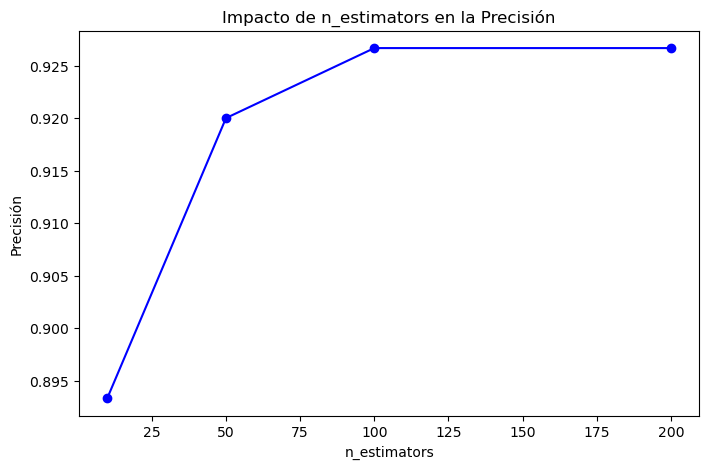

In [26]:
accuracies = []
n_values = [10, 50, 100, 200]

for n_estimators in n_values:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Gráfico de impacto de n_estimators
plt.figure(figsize=(8, 5))
plt.plot(n_values, accuracies, marker='o', color='blue')
plt.title("Impacto de n_estimators en la Precisión")
plt.xlabel("n_estimators")
plt.ylabel("Precisión")
plt.show()


### 5.1 Exploración de `max_depth`

Probamos diferentes valores de `max_depth` para ver cómo afecta la precisión.


max_depth=None, Accuracy=0.9267
max_depth=5, Accuracy=0.8933
max_depth=10, Accuracy=0.9267
max_depth=15, Accuracy=0.9267
max_depth=20, Accuracy=0.9267


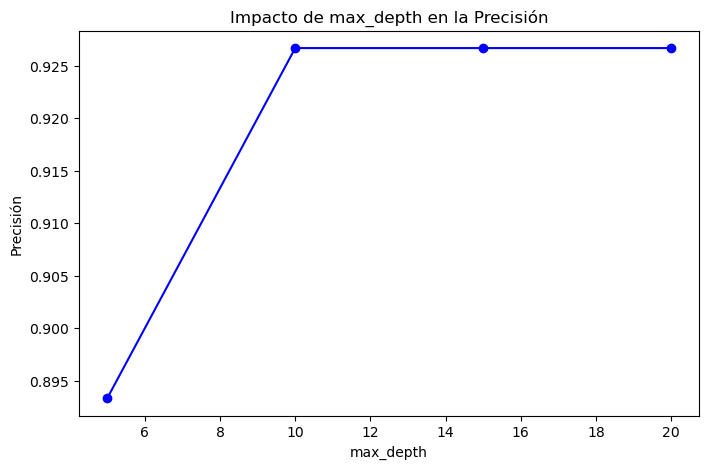

In [27]:
max_depth_values = [None, 5, 10, 15, 20]
accuracies = []

for depth in max_depth_values:
    rf_classifier = RandomForestClassifier(max_depth=depth, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"max_depth={depth}, Accuracy={accuracy:.4f}")

# Visualización del impacto de max_depth
plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, accuracies, marker='o', color='blue')
plt.title("Impacto de max_depth en la Precisión")
plt.xlabel("max_depth")
plt.ylabel("Precisión")
plt.show()


### 5.2 Exploración de `min_samples_split`

Ahora probamos diferentes valores de `min_samples_split` para evaluar su efecto.


min_samples_split=2, Accuracy=0.9267
min_samples_split=5, Accuracy=0.9267
min_samples_split=10, Accuracy=0.9200
min_samples_split=20, Accuracy=0.9067


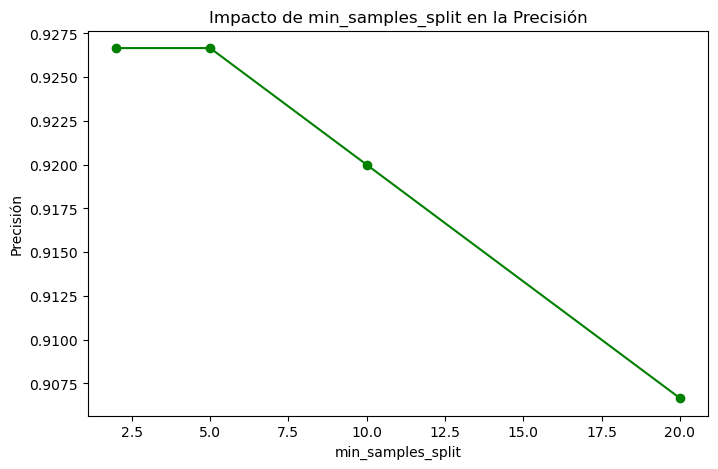

In [28]:
min_samples_split_values = [2, 5, 10, 20]
accuracies = []

for min_samples in min_samples_split_values:
    rf_classifier = RandomForestClassifier(min_samples_split=min_samples, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"min_samples_split={min_samples}, Accuracy={accuracy:.4f}")

# Visualización del impacto de min_samples_split
plt.figure(figsize=(8, 5))
plt.plot(min_samples_split_values, accuracies, marker='o', color='green')
plt.title("Impacto de min_samples_split en la Precisión")
plt.xlabel("min_samples_split")
plt.ylabel("Precisión")
plt.show()


### 5.3 Exploración de `min_samples_leaf`

Por último, evaluamos diferentes valores de `min_samples_leaf` para observar su influencia en el modelo.


min_samples_leaf=1, Accuracy=0.9267
min_samples_leaf=5, Accuracy=0.9133
min_samples_leaf=10, Accuracy=0.8733
min_samples_leaf=20, Accuracy=0.8533


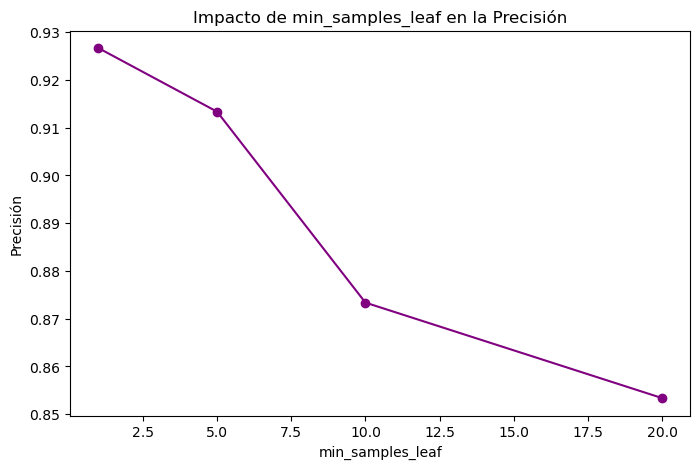

In [29]:
min_samples_leaf_values = [1, 5, 10, 20]
accuracies = []

for min_samples_leaf in min_samples_leaf_values:
    rf_classifier = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"min_samples_leaf={min_samples_leaf}, Accuracy={accuracy:.4f}")

# Visualización del impacto de min_samples_leaf
plt.figure(figsize=(8, 5))
plt.plot(min_samples_leaf_values, accuracies, marker='o', color='purple')
plt.title("Impacto de min_samples_leaf en la Precisión")
plt.xlabel("min_samples_leaf")
plt.ylabel("Precisión")
plt.show()


Después de ejecutar estos bloques, podrás observar cómo cada parámetro afecta el rendimiento del modelo:

- **`max_depth`:**  
  Controla el nivel de detalle que el modelo captura. Limitar `max_depth` puede ayudar a reducir el sobreajuste, especialmente en modelos con mucha profundidad.

- **`min_samples_split`:**  
  Aumentar este valor puede reducir el sobreajuste al evitar divisiones en nodos con pocos datos.

- **`min_samples_leaf`:**  
  Valores más altos para `min_samples_leaf` pueden producir árboles más generalizados y reducir la variabilidad del modelo.

Esta extensión te permite realizar un análisis más detallado de los efectos de cada hiperparámetro y ajustar el modelo de acuerdo a tus necesidades específicas.


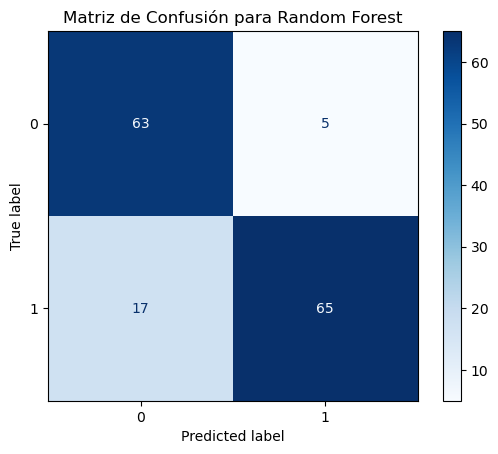

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

# Matriz de Confusión
ConfusionMatrixDisplay.from_estimator(rf_classifier, X_test, y_test, cmap="Blues")
plt.title("Matriz de Confusión para Random Forest")
plt.show()

### 6. Validación Cruzada

Usamos validación cruzada para evaluar la estabilidad del modelo.



In [31]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Mostrar resultados
print("Puntajes de validación cruzada:", cv_scores)
print("Media de los puntajes:", cv_scores.mean())
print("Desviación estándar:", cv_scores.std())


Puntajes de validación cruzada: [0.84285714 0.84285714 0.88571429 0.8        0.84285714]
Media de los puntajes: 0.8428571428571427
Desviación estándar: 0.02710523708715751


# Validación Cruzada

La validación cruzada es una técnica estadística usada para evaluar el rendimiento y la estabilidad de un modelo de aprendizaje supervisado. Se utiliza para asegurarse de que el modelo generaliza bien a datos no vistos, reduciendo el riesgo de sobreajuste o subajuste. Es especialmente útil cuando se trabaja con conjuntos de datos limitados.

---

## ¿Cómo Funciona?

La validación cruzada consiste en dividir los datos en varios subconjuntos o *folds*. A continuación, se sigue el siguiente proceso:

### División en Folds:
- El conjunto de datos se divide en `k` partes aproximadamente iguales (*k-fold cross-validation*).
- Por ejemplo, si `k=5`, los datos se dividen en 5 partes o *folds*.

### Entrenamiento y Validación:
- El modelo se entrena utilizando `k-1` folds y se evalúa en el fold restante, que actúa como conjunto de validación.
- Este proceso se repite `k` veces, rotando los folds utilizados para el entrenamiento y la validación.

### Promedio de Resultados:
- Se calculan métricas de rendimiento para cada iteración (precisión, recall, F1-score, etc.).
- Al final, se promedia el rendimiento de todas las iteraciones para obtener una estimación global.

---

## Tipos de Validación Cruzada

### 1. **k-Fold Cross-Validation**
- Divide los datos en `k` folds y realiza el proceso mencionado anteriormente.
- Es el método más común y ampliamente usado.

### 2. **Leave-One-Out Cross-Validation (LOOCV)**
- Cada observación del conjunto de datos se utiliza como conjunto de validación, mientras el resto se usa para el entrenamiento.
- Es muy exhaustivo pero computacionalmente costoso.

### 3. **Stratified k-Fold Cross-Validation**
- Similar a *k-Fold Cross-Validation*, pero asegura que cada fold tenga una representación proporcional de las clases (en problemas de clasificación).

### 4. **Repeated k-Fold Cross-Validation**
- Repite el proceso de *k-Fold Cross-Validation* varias veces con divisiones diferentes, proporcionando una estimación más robusta.


En este ejemplo utilizaremos  (k-Fold Cross-Validation) con k=5

In [32]:
# Realizar validación cruzada con 5 folds
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Mostrar resultados
print("Puntajes de validación cruzada:", cv_scores)
print("Media de los puntajes:", cv_scores.mean())
print("Desviación estándar:", cv_scores.std())

Puntajes de validación cruzada: [0.84285714 0.84285714 0.88571429 0.8        0.84285714]
Media de los puntajes: 0.8428571428571427
Desviación estándar: 0.02710523708715751


## Resultados de la Validación Cruzada

### Puntajes de Validación Cruzada:
- [0.84285714, 0.84285714, 0.88571429, 0.8, 0.84285714]

### Resumen:
- **Media de los puntajes:** 0.8429
- **Desviación estándar:** 0.0271

### Interpretación:
#### Media de los puntajes (0.8429):
El modelo tiene un rendimiento promedio aceptable. Esto indica que puede generalizar razonablemente bien a datos no vistos.

#### Desviación estándar (0.0271):
La variabilidad entre los diferentes folds es moderada. Esto podría significar que el modelo tiene ligeras inconsistencias en su rendimiento dependiendo de los datos de entrenamiento y validación.


## 8. Conclusiones

- **Random Forest** es un modelo robusto y eficaz para problemas de clasificación.
- Ajustar los hiperparámetros, como `n_estimators` y `max_depth`, mejora el rendimiento.
- La importancia de las características permite identificar las variables más relevantes.
- La validación cruzada asegura la estabilidad del modelo.


In [33]:
from sklearn.metrics import accuracy_score
import itertools

# Definir el rango de hiperparámetros manualmente
n_estimators = [50, 100, 200]
max_depth = [None, 10, 20, 30]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# Variable para almacenar los mejores parámetros y su puntaje
best_params = None
best_score = 0

# Iterar sobre todas las combinaciones de parámetros
for est, depth, split, leaf in itertools.product(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    rf_model = RandomForestClassifier(
        n_estimators=est,
        max_depth=depth,
        min_samples_split=split,
        min_samples_leaf=leaf,
        random_state=42
    )
    
    # Validación cruzada para evaluar el modelo
    scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    
    # Actualizar los mejores parámetros si el modelo actual es mejor
    if mean_score > best_score:
        best_score = mean_score
        best_params = {'n_estimators': est, 'max_depth': depth, 'min_samples_split': split, 'min_samples_leaf': leaf}

# Mostrar los mejores parámetros y el mejor puntaje
print("Mejores parámetros:", best_params)
print("Mejor puntaje de validación:", best_score)


Mejores parámetros: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Mejor puntaje de validación: 0.9085714285714286


O utilizando la instrucción GridSearchCV  se encarga de iterar sobre todas las combinaciones posibles de los hiperparámetros especificados en param_grid. Esto significa que no es necesario implementar un for explícito, ya que el proceso de búsqueda de parámetros óptimos lo realiza automáticamente GridSearchCV.

In [34]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo base de Random Forest
rf_base = RandomForestClassifier(random_state=42)

# Definir el rango de hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Configurar GridSearchCV con validación cruzada de 5 folds
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el mejor puntaje de validación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntaje de validación:", grid_search.best_score_)

# Entrenar el modelo óptimo con los mejores parámetros
rf_optimal = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
y_test_pred = rf_optimal.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Precisión en el conjunto de prueba:", test_accuracy)



Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor puntaje de validación: 0.9085714285714286
Precisión en el conjunto de prueba: 0.9266666666666666
